In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("births.csv")

In [5]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [6]:
df.shape

(15547, 5)

In [7]:
# Q.1: Add a new column "Decade"
df['Decade'] = (df['year'] // 10) * 10

In [8]:
df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [9]:
# Q.2: Show the descriptive statistics of the data
descriptive_stats = df.describe()
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


In [10]:
# Q.3: Check for missing values
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
Decade      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
Decade    0
dtype: int64

In [13]:
df

,year,month,day,gender,births,Decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15062,1988,12,29.0,M,5944,1980
15063,1988,12,30.0,F,5742,1980
15064,1988,12,30.0,M,6095,1980
15065,1988,12,31.0,F,4435,1980


In [14]:
# Q.4: Calculate trend of male & female births every decade
trend = df.groupby(['Decade', 'gender'])['births'].sum().unstack()
trend

gender,F,M
Decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,16336639,17171471


In [15]:
# Q.5: Remove outliers
mean = df['births'].mean()
print(mean)
std_dev = df['births'].std()
print(std_dev)
df = df[np.abs(df['births'] - mean) <= 5 * std_dev]

4678.631512577155
1003.1047066877805


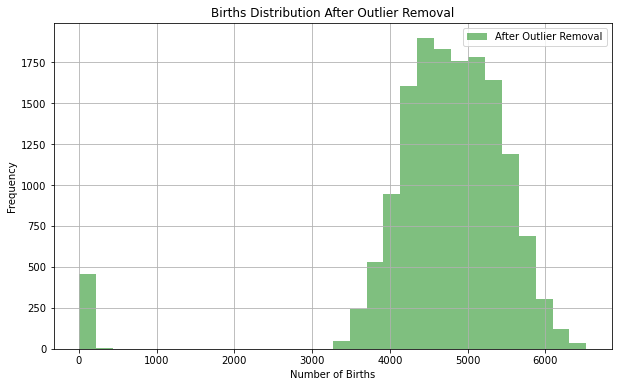

In [16]:
# Plot histogram after removing outliers
plt.figure(figsize=(10, 6))
plt.hist(df['births'], bins=30, color='green', alpha=0.5, label='After Outlier Removal')
plt.title('Births Distribution After Outlier Removal')
plt.xlabel('Number of Births')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
print(df.columns)

Index(['year', 'month', 'day', 'gender', 'births', 'Decade'], dtype='object')


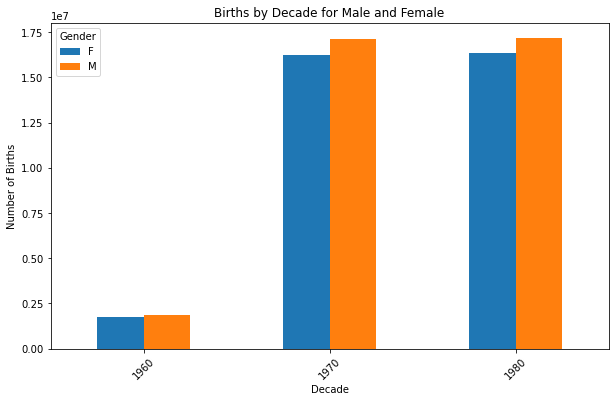

In [18]:
# Plot births by decade for male and female
births_by_decade = df.groupby(['Decade', 'gender'])['births'].sum().unstack()
births_by_decade.plot(kind='bar', figsize=(10, 6))
plt.title('Births by Decade for Male and Female')
plt.xlabel('Decade')
plt.ylabel('Number of Births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [19]:
# Q.7: Group the data by month and day separately
births_by_month = df.groupby(['month'])['births'].sum()
births_by_day = df.groupby(['day'])['births'].sum()

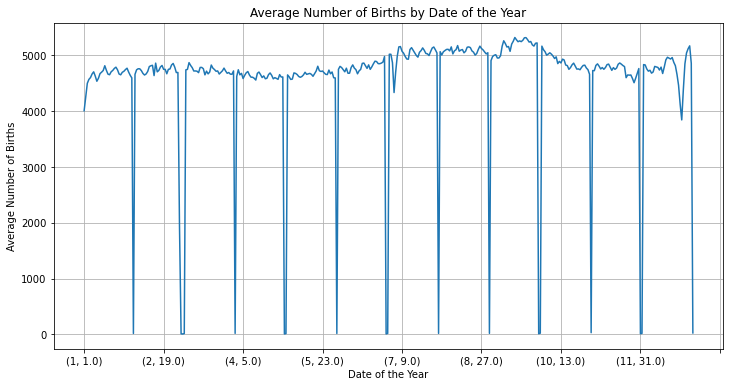

In [29]:
# Q.8: Plot average number of births by date of the year
average_births_by_date = df.groupby(['month', 'day'])['births'].mean()
average_births_by_date.plot(figsize=(12, 6))
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date of the Year')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.show()

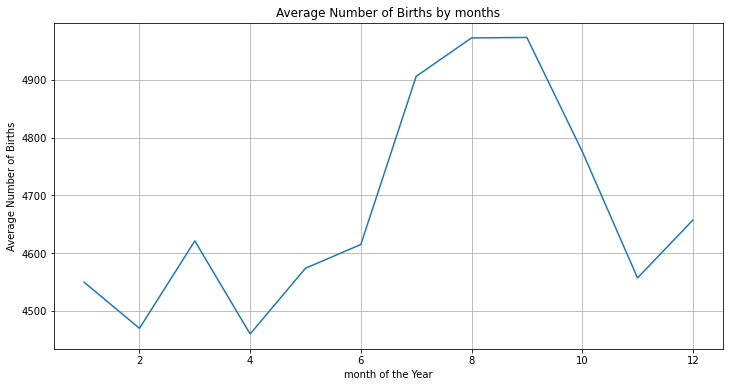

In [32]:
average_births_by_date = df.groupby(['month'])['births'].mean()
average_births_by_date.plot(figsize=(12, 6))
plt.title('Average Number of Births by months')
plt.xlabel('month of the Year')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.show()